In [128]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [129]:
#read dataset into a df
df = pd.read_csv('departures_for_foreign_employment_by_manpower_level_1994_2012_0.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    19 non-null     int64  
 1   Professional Level No.  19 non-null     int64  
 2   Professional Level %    19 non-null     float64
 3   Middle Level No.        19 non-null     int64  
 4   Middle Level  %         19 non-null     float64
 5   Clerical & Related No.  19 non-null     int64  
 6   Clerical & Related  %   19 non-null     float64
 7   Skilled No.             19 non-null     int64  
 8   Skilled %               19 non-null     float64
 9   Semi Skilled No.        19 non-null     object 
 10  Semi Skilled %          19 non-null     object 
 11  Unskilled No.           19 non-null     int64  
 12  Unskilled %             19 non-null     float64
 13  Housemaid No.           19 non-null     int64  
 14  Housemaid %             19 non-null     floa

In [130]:
df.columns


Index(['Year', 'Professional Level No.', 'Professional Level % ',
       'Middle Level No.', 'Middle Level  % ', 'Clerical & Related No.',
       'Clerical & Related  % ', 'Skilled No.', 'Skilled % ',
       'Semi Skilled No. ', 'Semi Skilled % ', 'Unskilled No.', 'Unskilled %',
       'Housemaid No.', 'Housemaid %', 'Total'],
      dtype='object')

In [131]:
#seems there are whitespaces in the columns.so remove the whitespaces.
df.columns = df.columns.str.strip()
df.columns

Index(['Year', 'Professional Level No.', 'Professional Level %',
       'Middle Level No.', 'Middle Level  %', 'Clerical & Related No.',
       'Clerical & Related  %', 'Skilled No.', 'Skilled %', 'Semi Skilled No.',
       'Semi Skilled %', 'Unskilled No.', 'Unskilled %', 'Housemaid No.',
       'Housemaid %', 'Total'],
      dtype='object')

In [132]:
#check for null values
df.isnull().sum()

Year                      0
Professional Level No.    0
Professional Level %      0
Middle Level No.          0
Middle Level  %           0
Clerical & Related No.    0
Clerical & Related  %     0
Skilled No.               0
Skilled %                 0
Semi Skilled No.          0
Semi Skilled %            0
Unskilled No.             0
Unskilled %               0
Housemaid No.             0
Housemaid %               0
Total                     0
dtype: int64

In [133]:
#check the full dataset
df

,Year,Professional Level No.,Professional Level %,Middle Level No.,Middle Level %,Clerical & Related No.,Clerical & Related %,Skilled No.,Skilled %,Semi Skilled No.,Semi Skilled %,Unskilled No.,Unskilled %,Housemaid No.,Housemaid %,Total
0,1994,262,0.73,833,1.38,1559,2.59,12586,20.92,-,-,8824,14.67,36104,60.01,60168
1,1995,878,0.77,2495,1.45,4594,2.66,27165,15.75,-,-,23497,13.62,113860,66.01,172489
2,1996,599,0.54,1944,1.20,3371,2.07,24254,14.92,-,-,21929,13.49,110479,67.96,162576
3,1997,573,0.58,1635,1.09,3579,2.38,24502,16.30,-,-,20565,13.68,99429,66.16,150283
4,1998,695,0.81,2823,1.77,4896,3.06,31749,19.87,-,-,34304,21.46,85349,53.40,159816
5,1999,1253,1.42,3161,1.76,6210,3.46,37277,20.74,-,-,43771,24.35,88063,49.00,179735
6,2000,935,0.94,3781,2.08,5825,3.20,36475,20.02,-,-,35759,19.63,99413,54.57,182188
7,2001,1218,1.18,3776,2.05,6015,3.27,36763,19.98,-,-,33385,18.14,102850,55.89,184007
8,2002,1481,1.36,4555,2.24,7239,3.55,45478,22.32,-,-,36485,17.90,108535,53.26,203773
9,2003,1541,1.51,7507,3.58,6779,3.23,47744,22.75,-,-,44264,21.09,102011,48.61,209846


In [134]:
#There are - in two columns.Replace those with 0s
df['Semi Skilled No.'] = df['Semi Skilled No.'].replace('-', 0)
df['Semi Skilled %'] = df['Semi Skilled %'].replace('-', 0)
df

,Year,Professional Level No.,Professional Level %,Middle Level No.,Middle Level %,Clerical & Related No.,Clerical & Related %,Skilled No.,Skilled %,Semi Skilled No.,Semi Skilled %,Unskilled No.,Unskilled %,Housemaid No.,Housemaid %,Total
0,1994,262,0.73,833,1.38,1559,2.59,12586,20.92,0,0,8824,14.67,36104,60.01,60168
1,1995,878,0.77,2495,1.45,4594,2.66,27165,15.75,0,0,23497,13.62,113860,66.01,172489
2,1996,599,0.54,1944,1.20,3371,2.07,24254,14.92,0,0,21929,13.49,110479,67.96,162576
3,1997,573,0.58,1635,1.09,3579,2.38,24502,16.30,0,0,20565,13.68,99429,66.16,150283
4,1998,695,0.81,2823,1.77,4896,3.06,31749,19.87,0,0,34304,21.46,85349,53.40,159816
5,1999,1253,1.42,3161,1.76,6210,3.46,37277,20.74,0,0,43771,24.35,88063,49.00,179735
6,2000,935,0.94,3781,2.08,5825,3.20,36475,20.02,0,0,35759,19.63,99413,54.57,182188
7,2001,1218,1.18,3776,2.05,6015,3.27,36763,19.98,0,0,33385,18.14,102850,55.89,184007
8,2002,1481,1.36,4555,2.24,7239,3.55,45478,22.32,0,0,36485,17.90,108535,53.26,203773
9,2003,1541,1.51,7507,3.58,6779,3.23,47744,22.75,0,0,44264,21.09,102011,48.61,209846


In [135]:
#Convert object datatypes to int and float.
df['Semi Skilled No.'] = df['Semi Skilled No.'].astype(int)
df['Semi Skilled %'] = df['Semi Skilled %'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    19 non-null     int64  
 1   Professional Level No.  19 non-null     int64  
 2   Professional Level %    19 non-null     float64
 3   Middle Level No.        19 non-null     int64  
 4   Middle Level  %         19 non-null     float64
 5   Clerical & Related No.  19 non-null     int64  
 6   Clerical & Related  %   19 non-null     float64
 7   Skilled No.             19 non-null     int64  
 8   Skilled %               19 non-null     float64
 9   Semi Skilled No.        19 non-null     int32  
 10  Semi Skilled %          19 non-null     float64
 11  Unskilled No.           19 non-null     int64  
 12  Unskilled %             19 non-null     float64
 13  Housemaid No.           19 non-null     int64  
 14  Housemaid %             19 non-null     floa

<Figure size 1200x600 with 0 Axes>

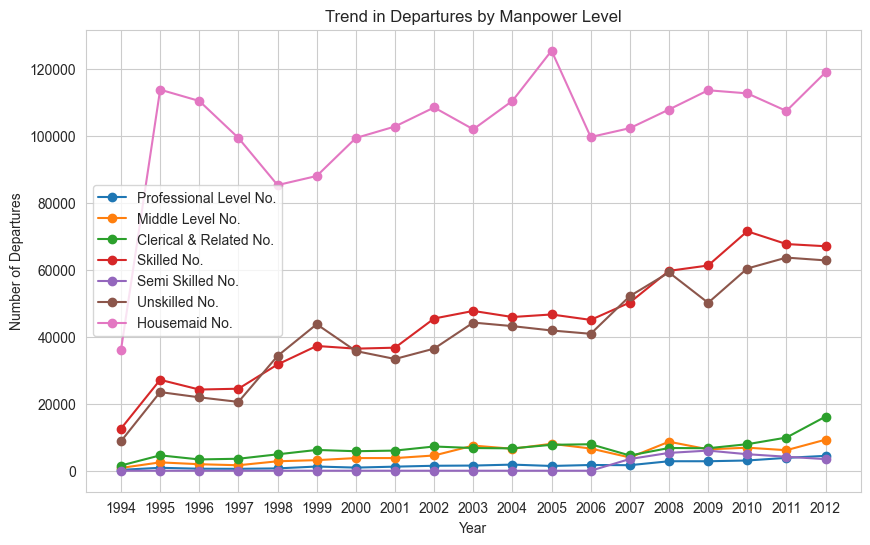

In [136]:
#Check the trends over the years
plt.figure(figsize=(12, 6))
column_set = ['Professional Level No.','Middle Level No.','Clerical & Related No.', 'Skilled No.',  'Semi Skilled No.', 'Unskilled No.',
'Housemaid No.']

plt.figure(figsize=(10, 6))
for col in column_set:  
    plt.plot(df['Year'], df[col], marker='o', label=col)
plt.title('Trend in Departures by Manpower Level')
plt.xlabel('Year')
plt.xticks(df['Year'], df['Year'].astype(int))
plt.ylabel('Number of Departures')
plt.legend()
plt.show()




In [137]:
df.describe()

,Year,Professional Level No.,Professional Level %,Middle Level No.,Middle Level %,Clerical & Related No.,Clerical & Related %,Skilled No.,Skilled %,Semi Skilled No.,Semi Skilled %,Unskilled No.,Unskilled %,Housemaid No.,Housemaid %,Total
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2003.000000,1740.105263,1.522632,5003.368421,2.340526,6550.263158,3.148421,44174.368421,21.335789,1443.000000,0.569474,40912.631579,19.654211,102371.578947,52.163158,202195.315789
std,5.627314,1153.138948,0.819030,2536.955989,0.823451,3026.246444,0.810872,16351.026224,3.205915,2248.827102,0.890278,15289.949129,3.659994,18735.239192,8.275259,51860.330743
min,1994.000000,262.000000,0.540000,833.000000,1.090000,1559.000000,2.070000,12586.000000,14.920000,0.000000,0.000000,8824.000000,13.490000,36104.000000,40.880000,60168.000000
25%,1998.500000,906.500000,0.875000,2992.000000,1.765000,4745.000000,2.685000,34112.000000,20.000000,0.000000,0.000000,33844.500000,18.010000,99570.000000,46.425000,176112.000000
50%,2003.000000,1481.000000,1.420000,4555.000000,2.240000,6679.000000,3.110000,45478.000000,21.390000,0.000000,0.000000,41904.000000,20.260000,107491.000000,51.470000,203773.000000
75%,2007.500000,2329.500000,1.685000,6761.000000,3.175000,7490.500000,3.405000,54990.500000,23.385000,3482.000000,1.410000,51174.500000,22.425000,111632.000000,55.230000,239208.000000
max,2012.000000,4445.000000,3.580000,9278.000000,3.580000,16166.000000,5.730000,71537.000000,26.740000,6015.000000,2.430000,63680.000000,24.350000,125493.000000,67.960000,282331.000000


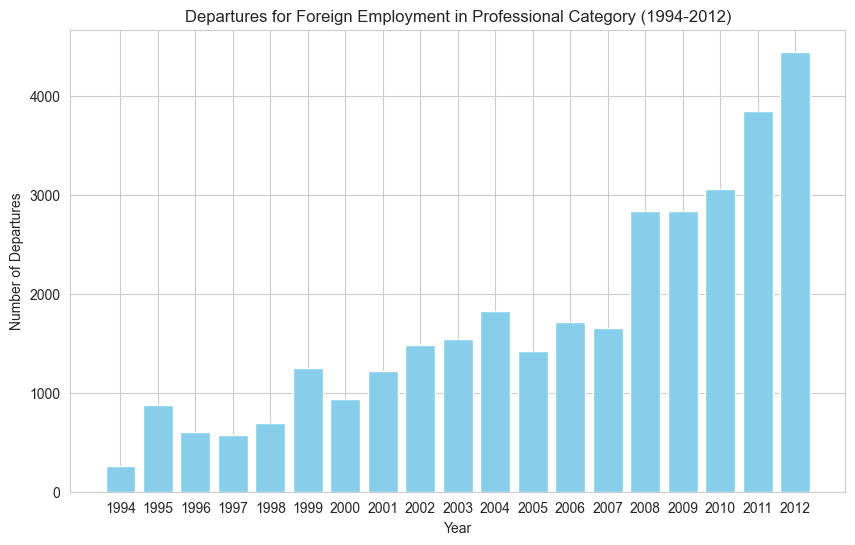

In [138]:
# Filter the data for the "Professional Level No." category
professional_data = df[['Year', 'Professional Level No.']]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(professional_data['Year'], professional_data['Professional Level No.'], color='skyblue')
plt.title('Departures for Foreign Employment in Professional Category (1994-2012)')
plt.xlabel('Year')
plt.xticks(df['Year'], df['Year'].astype(int))
plt.ylabel('Number of Departures')
plt.grid(True)
plt.show()

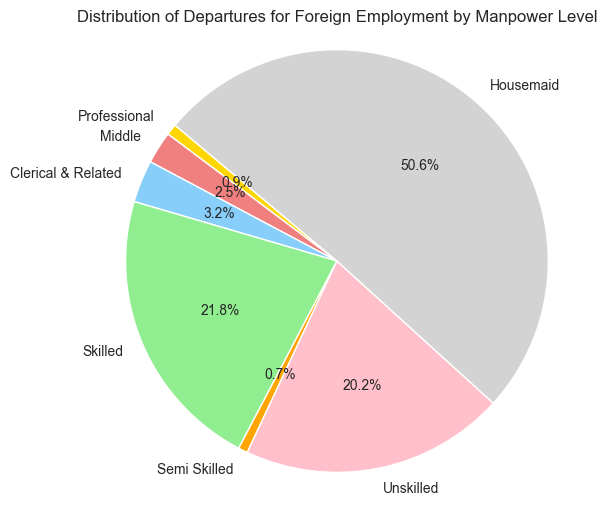

In [139]:
# Select the columns for the pie chart
manpower_levels = ['Professional Level No.', 'Middle Level No.', 'Clerical & Related No.', 'Skilled No.', 'Semi Skilled No.', 'Unskilled No.', 'Housemaid No.']
labels = ['Professional', 'Middle', 'Clerical & Related', 'Skilled', 'Semi Skilled', 'Unskilled', 'Housemaid']
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'pink', 'lightgrey']

# Calculate the total departures for each manpower level
total_departures = [df[level].sum() for level in manpower_levels]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(total_departures, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Departures for Foreign Employment by Manpower Level')
plt.axis('equal') 
plt.show()


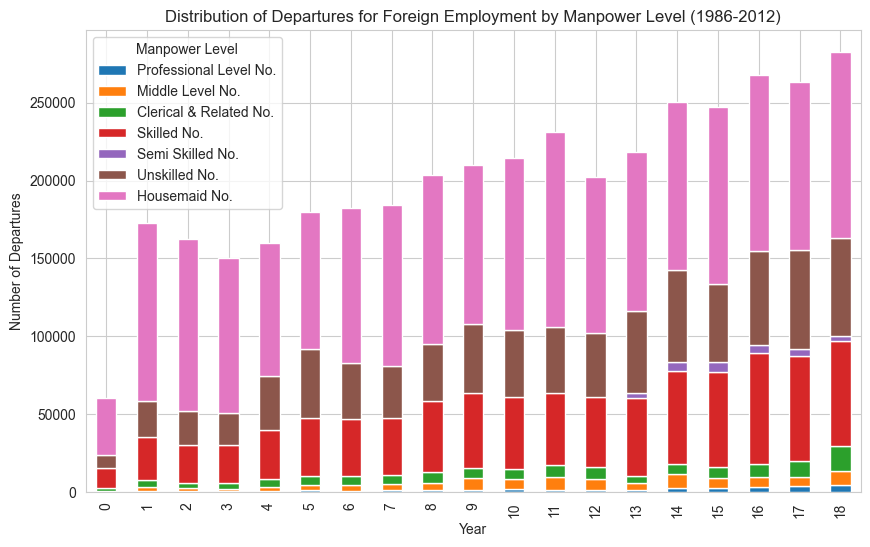

In [140]:
import matplotlib.pyplot as plt

# Plot the distribution of departures for foreign employment by manpower level
plt.figure(figsize=(10, 6))
df[['Professional Level No.', 'Middle Level No.', 'Clerical & Related No.', 'Skilled No.', 'Semi Skilled No.', 'Unskilled No.', 'Housemaid No.']].plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribution of Departures for Foreign Employment by Manpower Level (1986-2012)')
plt.xlabel('Year')
plt.ylabel('Number of Departures')
plt.legend(title='Manpower Level')
plt.show()


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


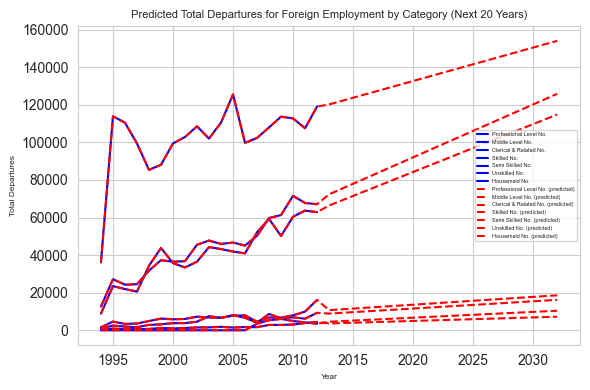

In [141]:

# Select the year and category columns
X = df[['Year']]
categories = ['Professional Level No.', 'Middle Level No.', 'Clerical & Related No.', 'Skilled No.', 'Semi Skilled No.', 'Unskilled No.', 'Housemaid No.']

# Create a dictionary to store predictions for each category
predictions = {}

# Fit a linear regression model and predict values for each category
for category in categories:
    y = df[category]
    model = LinearRegression()
    model.fit(X, y)
    future_years = np.arange(df['Year'].iloc[-1] + 1, df['Year'].iloc[-1] + 21).reshape(-1, 1)
    predicted_values = model.predict(future_years)
    predictions[category] = predicted_values

# Plot the actual and predicted values for each category
plt.figure(figsize=(6, 4))

# Plot actual values
for category in categories:
    plt.plot(df['Year'], df[category], label=category, linestyle='-', color='blue')

# Plot predicted values
for category, values in predictions.items():
    plt.plot(np.concatenate((df['Year'], future_years.ravel())), 
             np.concatenate((df[category], values)), 
             label=category + ' (predicted)', linestyle='--', color='red')


plt.title('Predicted Total Departures for Foreign Employment by Category (Next 20 Years)', fontsize=8)
plt.xlabel('Year', fontsize=6)
plt.ylabel('Total Departures', fontsize=6)
plt.legend(fontsize=4)
plt.grid(True)
plt.tight_layout()
plt.show()
